In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [77]:
data = pd.read_csv('https://raw.githubusercontent.com/AlexanderOG/AI_CRI/main/train.csv')
kaggle_test_data = pd.read_csv("https://raw.githubusercontent.com/AlexanderOG/AI_CRI/main/test.csv")

## **1. Data cleaning and feature Engineering**

In [78]:
# We changed the encoding of survived from (0,1) to (-1,1) where 0 and -1 = not survived
data["Survived"] = data["Survived"].apply(lambda x: 1 if x == 1 else -1)
data["Survived"].value_counts()

-1    549
 1    342
Name: Survived, dtype: int64

In [79]:
#Encoding the Sex variable
def encode_sex(x):
    if x == 'male':
        return 0
    elif x == 'female':
        return 1

data['Sexcode'] = data['Sex'].apply(encode_sex)
kaggle_test_data['Sexcode'] = kaggle_test_data['Sex'].apply(encode_sex)

In [80]:
#Creating a new variable: 5 categories for the different prices paid (Fare)
def categorize_fare(x):
    if x == 0:
        return 0
    elif x < 15:
        return 1
    elif x < 30:
        return 2
    elif x < 100:
        return 3
    else:
        return 4
data['FareCat']= data['Fare'].apply(categorize_fare)
kaggle_test_data['FareCat']= kaggle_test_data['Fare'].apply(categorize_fare)

In [81]:
#Creating a new variable with the number of family members each passenger has on board
data['FamilyCount']=data['Parch']+data['SibSp']+1
kaggle_test_data['FamilyCount']=kaggle_test_data['Parch']+kaggle_test_data['SibSp']+1

In [82]:
#Filling missing values in Age with the median
data['Age']= data['Age'].fillna(data['Age'].dropna().median())
kaggle_test_data['Age']= kaggle_test_data['Age'].fillna(kaggle_test_data['Age'].dropna().median())
#Filling missing values in Fare
kaggle_test_data['Fare']= kaggle_test_data['Fare'].fillna(kaggle_test_data['Fare'].dropna().median())

In [83]:
#Creating 5 categories for Age to have values ranging from 0 to 4
def categorize_age(x):
    if x <= 16:
        return 0
    elif x <= 32:
        return 1
    elif x <= 48:
        return 2
    elif x <= 64:
        return 3
    elif x <= 80:
        return 4

data['AgeCat'] = data['Age'].apply(categorize_age)
kaggle_test_data['AgeCat']= kaggle_test_data['Age'].apply(categorize_age)

In [84]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [85]:
#Replacing missing values with most frequent one
data['Embarked'] = data['Embarked'].fillna('S')
kaggle_test_data['Embarked'] = kaggle_test_data['Embarked'].fillna('S')
#Dummifying the embarked variable
data =  pd.concat([data, pd.get_dummies(data["Embarked"],prefix="Embarked")], axis=1, join="inner")
kaggle_test_data =  pd.concat([kaggle_test_data, pd.get_dummies(kaggle_test_data["Embarked"],prefix="Embarked")], axis=1, join="inner")

In [86]:
#Dummifying the Pclass variable
data =  pd.concat([data, pd.get_dummies(data["Pclass"],prefix="Pclass")], axis=1, join="inner")
kaggle_test_data =  pd.concat([kaggle_test_data, pd.get_dummies(kaggle_test_data["Pclass"],prefix="Pclass")], axis=1, join="inner")



```
# This is formatted as code
```

## **2. KNN model**

In [87]:
X = data[["Pclass_1","Pclass_2","Pclass_3","SibSp","Parch","Fare","Sexcode","FareCat","FamilyCount","AgeCat","Embarked_C","Embarked_Q","Embarked_S"]]
y = data.Survived
X_test = kaggle_test_data[["Pclass_1","Pclass_2","Pclass_3","SibSp","Parch","Fare","Sexcode","FareCat","FamilyCount","AgeCat","Embarked_C","Embarked_Q","Embarked_S"]]

In [88]:
score = []
neighbours = []

for k in range(1,25):
    
    # Instanciate the model
    knn_model = KNeighborsClassifier(n_neighbors = k)

    # Train the model on the scaled Training data
    cv_results = cross_validate(knn_model, X.values,y.values, cv = 5, scoring = 'accuracy')

    # Append the score and k
    score.append(cv_results['test_score'].mean())
    neighbours.append(k)

Mean: 0.722
Standard deviation: 0.019


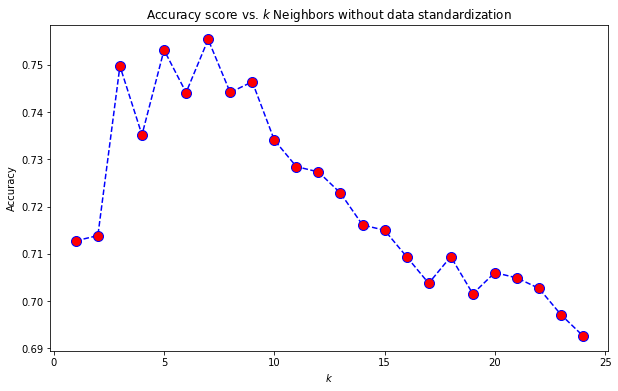

In [89]:
plt.figure(figsize=(10,6))
plt.plot(range(1,25),score,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy score vs. $k$ Neighbors without data standardization')
plt.xlabel('$k$')
plt.ylabel('Accuracy');
print("Mean:",round(np.array(score).mean(),3))
print("Standard deviation:",round(np.array(score).std(),3))

In [90]:
# The best k seems to be 7
best_k = 7

Mean: 0.793
Standard deviation: 0.014


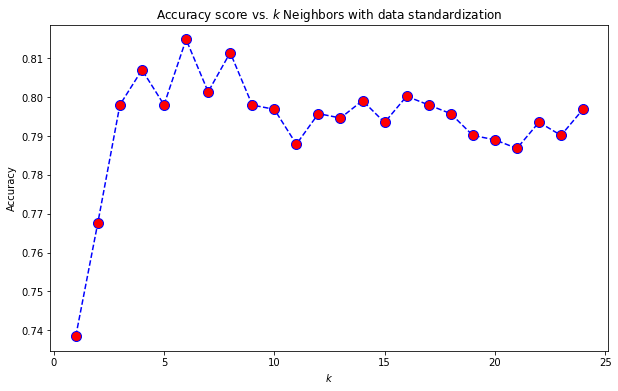

In [91]:
X = data[["Pclass_1","Pclass_2","Pclass_3","SibSp","Parch","Fare","Sexcode","FareCat","FamilyCount","AgeCat","Embarked_C","Embarked_Q","Embarked_S"]]
y = data.Survived

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

score = []
neighbours = []

for k in range(1,25):
    
    # Instanciate the model
    knn_model = KNeighborsClassifier(n_neighbors = k)

    # Train the model on the scaled Training data
    cv_results = cross_validate(knn_model, X_scaled,y.values, cv = 5, scoring = 'accuracy')

    # Append the score and k
    score.append(cv_results['test_score'].mean())
    neighbours.append(k)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,25),score,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy score vs. $k$ Neighbors with data standardization')
plt.xlabel('$k$')
plt.ylabel('Accuracy');
print("Mean:",round(np.array(score).mean(),3))
print("Standard deviation:",round(np.array(score).std(),3))

Now that we know that standardizing the data improves accuracy and that best k = 7, we proceed with the tests on sample size and attributes.

Mean: 0.754
Standard deviation: 0.062


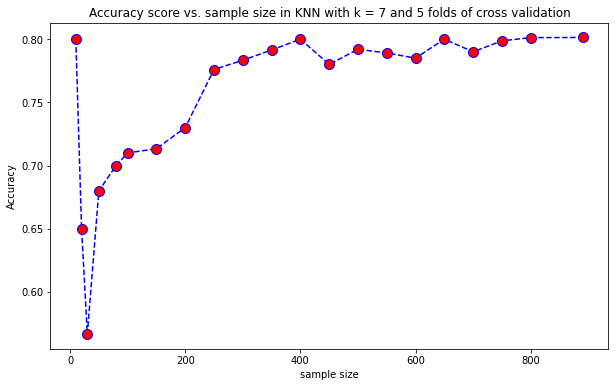

In [92]:
sample_sizes = [10,20,30,50,80,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,891]
X = data[["Pclass_1","Pclass_2","Pclass_3","SibSp","Parch","Fare","Sexcode","FareCat","FamilyCount","AgeCat","Embarked_C","Embarked_Q","Embarked_S"]]
y = data.Survived

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.fit_transform(X_test)

best_k = 7
score = []

for s in sample_sizes:
    # Instanciate the model
    knn_model = KNeighborsClassifier(n_neighbors = best_k)
    
    X_sample = X_scaled[:s]
    y_sample = y[:s]

    # Train the model on the scaled Training data
    cv_results = cross_validate(knn_model, X_sample,y_sample.values, cv = 5, scoring = 'accuracy')

    # Append the score
    score.append(cv_results['test_score'].mean())
    
plt.figure(figsize=(10,6))
plt.plot(sample_sizes,score,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy score vs. sample size in KNN with k = 7 and 5 folds of cross validation')
plt.xlabel('sample size')
plt.ylabel('Accuracy');
print("Mean:",round(np.array(score).mean(),3))
print("Standard deviation:",round(np.array(score).std(),3))

Mean: 0.804
Standard deviation: 0.009


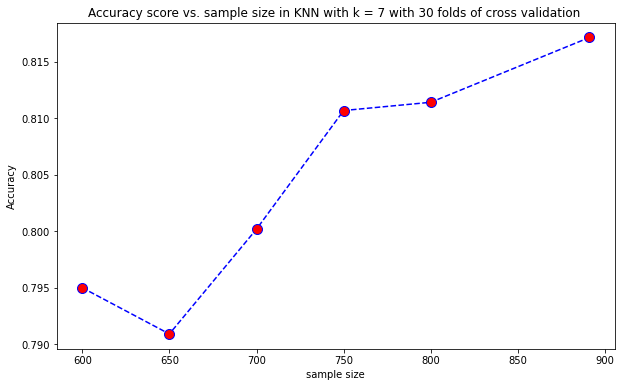

In [93]:
sample_sizes = [600,650,700,750,800,891]
X = data[["Pclass_1","Pclass_2","Pclass_3","SibSp","Parch","Fare","Sexcode","FareCat","FamilyCount","AgeCat","Embarked_C","Embarked_Q","Embarked_S"]]
y = data.Survived

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

best_k = 7
score = []

for s in sample_sizes:
    # Instanciate the model
    knn_model = KNeighborsClassifier(n_neighbors = best_k)
    
    X_sample = X_scaled[:s]
    y_sample = y[:s]

    # Train the model on the scaled Training data
    cv_results = cross_validate(knn_model, X_sample,y_sample.values, cv = 30, scoring = 'accuracy')

    # Append the score
    score.append(cv_results['test_score'].mean())
    
plt.figure(figsize=(10,6))
plt.plot(sample_sizes,score,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy score vs. sample size in KNN with k = 7 with 30 folds of cross validation ')
plt.xlabel('sample size')
plt.ylabel('Accuracy');
print("Mean:",round(np.array(score).mean(),3))
print("Standard deviation:",round(np.array(score).std(),3))

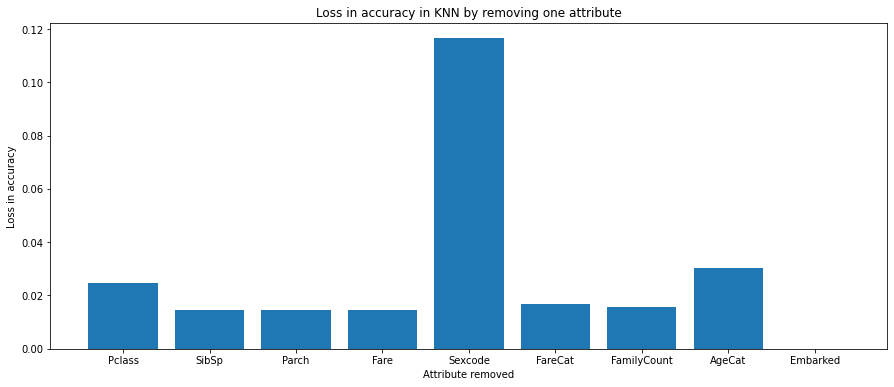

In [94]:
plt.rcParams['figure.figsize'] = (15, 6)

all_variables = ["Pclass_1","Pclass_2","Pclass_3","SibSp","Parch","Fare","Sexcode","FareCat","FamilyCount","AgeCat","Embarked_C","Embarked_Q","Embarked_S"]
y = data.Survived

score = []

for i in range(len(all_variables)):
    knn_model = KNeighborsClassifier(n_neighbors = best_k)
    using = all_variables.copy()
    without = all_variables[i]
    if "Pclass" in without:
        using.remove("Pclass_1")
        using.remove("Pclass_2")
        using.remove("Pclass_3")
    elif "Embarked" in without:
        using.remove("Embarked_C")
        using.remove("Embarked_Q")
        using.remove("Embarked_S")
    else:
        using.remove(without)

    X = data[using]
    scaler = StandardScaler()
    X_rescaled = scaler.fit_transform(X)
    
    cv_results = cross_validate(knn_model, X_rescaled,y.values, cv = 30, scoring = 'accuracy')
    score.append(cv_results["test_score"].mean())
    
all_variables = ["Pclass","SibSp","Parch","Fare","Sexcode","FareCat","FamilyCount","AgeCat","Embarked"]
loss = [max(score) - x for x in score]
loss = loss[2:11]
plt.bar(all_variables,loss)
plt.title("Loss in accuracy in KNN by removing one attribute")
plt.xlabel("Attribute removed")
plt.ylabel("Loss in accuracy")
plt.rcParams['figure.figsize'] = (10, 6)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


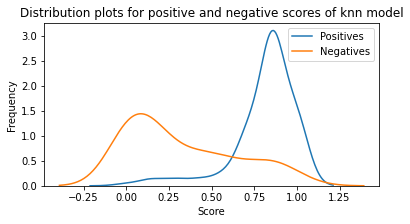

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=5)

knn_model=KNeighborsClassifier(n_neighbors = best_k)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)  #predict for default 0.5 threshold
y_pred_prob = knn_model.predict_proba(X_test) #get the probabilities of predictions

scores_for_negatives = y_pred_prob[y_test==1][:,0]
scores_for_positives = y_pred_prob[y_test==-1][:,0]

plt.figure(figsize=(6,3))
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution plots for positive and negative scores of knn model')

sns.distplot(scores_for_positives, label='Positives', hist=False)
sns.distplot(scores_for_negatives, label='Negatives', hist=False)
plt.legend(loc='best')

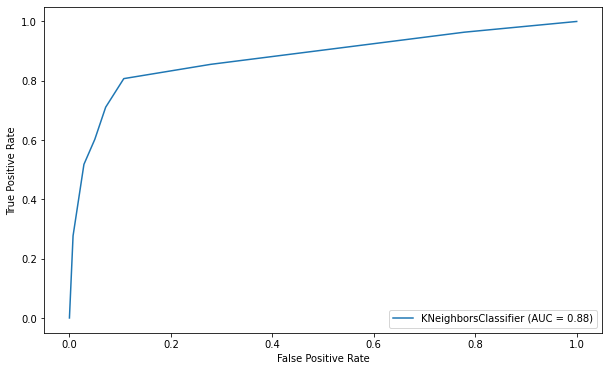

In [96]:
knn_model.fit(X_train, y_train)
metrics.plot_roc_curve(knn_model, X_test, y_test)
plt.show()

# **3. LDA model**

Mean: 0.773
Standard deviation: 0.088


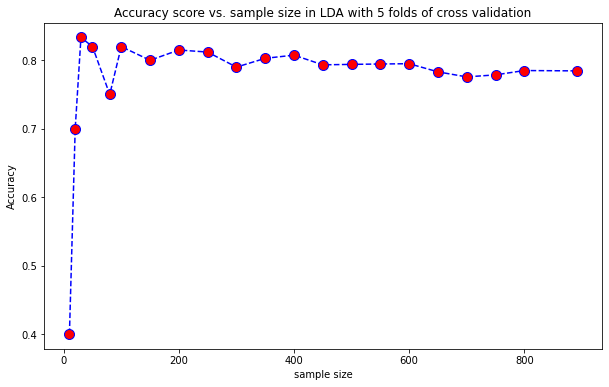

In [97]:
sample_sizes = [10,20,30,50,80,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,891]
X = data[["Pclass_1","Pclass_2","Pclass_3","SibSp","Parch","Fare","Sexcode","FareCat","FamilyCount","AgeCat","Embarked_C","Embarked_Q","Embarked_S"]]
y = data.Survived

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

score = []

for s in sample_sizes:
    # Instanciate the model
    lda_model = LDA()
    
    X_sample = X_scaled[:s]
    y_sample = y[:s]

    # Train the model on the scaled Training data
    cv_results = cross_validate(lda_model, X_sample,y_sample.values, cv = 5, scoring = 'accuracy')

    # Append the score
    score.append(cv_results['test_score'].mean())
    
plt.figure(figsize=(10,6))
plt.plot(sample_sizes,score,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy score vs. sample size in LDA with 5 folds of cross validation')
plt.xlabel('sample size')
plt.ylabel('Accuracy');
print("Mean:",round(np.array(score).mean(),3))
print("Standard deviation:",round(np.array(score).std(),3))

Mean: 0.786
Standard deviation: 0.003


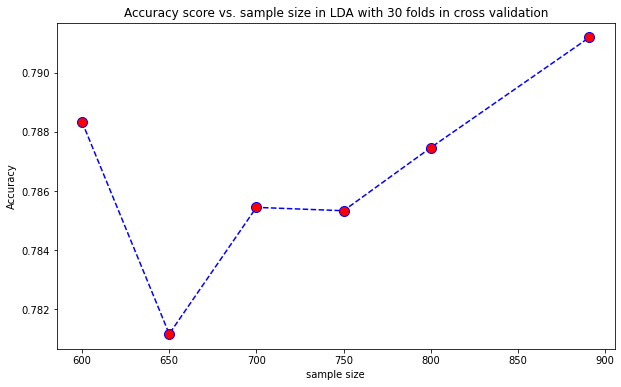

In [98]:
sample_sizes = [600,650,700,750,800,891]
X = data[["Pclass_1","Pclass_2","Pclass_3","SibSp","Parch","Fare","Sexcode","FareCat","FamilyCount","AgeCat","Embarked_C","Embarked_Q","Embarked_S"]]
y = data.Survived

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

score = []

for s in sample_sizes:
    # Instanciate the model
    lda_model = LDA()
    
    X_sample = X_scaled[:s]
    y_sample = y[:s]

    # Train the model on the scaled Training data
    cv_results = cross_validate(lda_model, X_sample,y_sample.values, cv = 30, scoring = 'accuracy')

    # Append the score
    score.append(cv_results['test_score'].mean())
    
plt.figure(figsize=(10,6))
plt.plot(sample_sizes,score,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy score vs. sample size in LDA with 30 folds in cross validation')
plt.xlabel('sample size')
plt.ylabel('Accuracy');
print("Mean:",round(np.array(score).mean(),3))
print("Standard deviation:",round(np.array(score).std(),3))

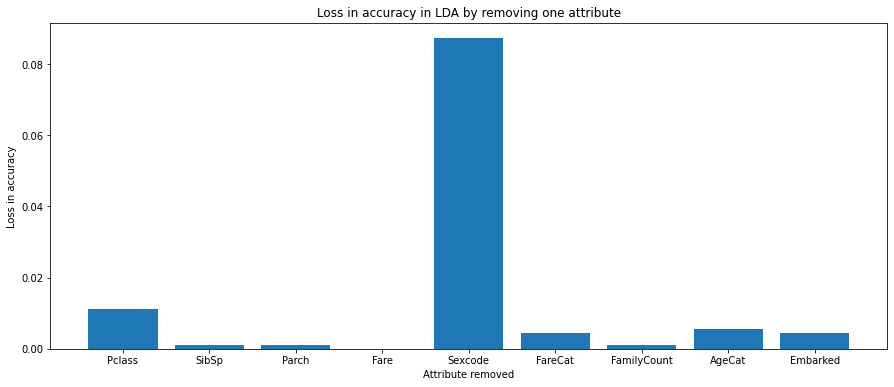

In [99]:
plt.rcParams['figure.figsize'] = (15, 6)

all_variables = ["Pclass_1","Pclass_2","Pclass_3","SibSp","Parch","Fare","Sexcode","FareCat","FamilyCount","AgeCat","Embarked_C","Embarked_Q","Embarked_S"]
y = data.Survived

score = []

for i in range(len(all_variables)):
    lda_model = LDA()
    using = all_variables.copy()
    without = all_variables[i]
    if "Pclass" in without:
        using.remove("Pclass_1")
        using.remove("Pclass_2")
        using.remove("Pclass_3")
    elif "Embarked" in without:
        using.remove("Embarked_C")
        using.remove("Embarked_Q")
        using.remove("Embarked_S")
    else:
        using.remove(without)

    X = data[using]
    scaler = StandardScaler()
    X_rescaled = scaler.fit_transform(X)
    
    cv_results = cross_validate(lda_model, X_rescaled,y.values, cv = 30, scoring = 'accuracy')
    score.append(cv_results["test_score"].mean())
    
all_variables = ["Pclass","SibSp","Parch","Fare","Sexcode","FareCat","FamilyCount","AgeCat","Embarked"]
loss = [max(score) - x for x in score]
loss = loss[2:11]
plt.bar(all_variables,loss)
plt.title("Loss in accuracy in LDA by removing one attribute")
plt.xlabel("Attribute removed")
plt.ylabel("Loss in accuracy")
plt.rcParams['figure.figsize'] = (10, 6)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


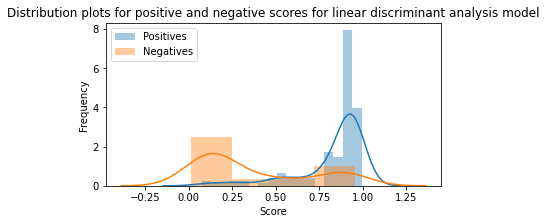

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=5)

lda_model=LDA()
lda_model.fit(X_train, y_train)

y_pred = lda_model.predict(X_test)  #predict for default 0.5 threshold
y_pred_prob = lda_model.predict_proba(X_test) #get the probabilities of predictions

scores_for_negatives = y_pred_prob[y_test==1][:,0]
scores_for_positives = y_pred_prob[y_test==-1][:,0]

plt.figure(figsize=(6,3))
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution plots for positive and negative scores for linear discriminant analysis model')

sns.distplot(scores_for_positives, label='Positives', hist=True)
sns.distplot(scores_for_negatives, label='Negatives', hist=True)
plt.legend(loc='best');

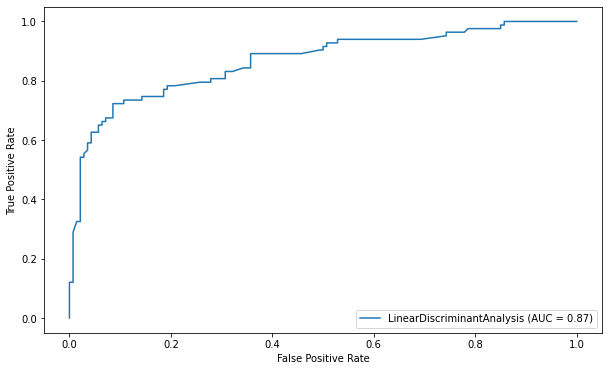

In [101]:
lda_model.fit(X_train, y_train)
metrics.plot_roc_curve(lda_model, X_test, y_test)
plt.show()

# **4. Logistic Regression**

Mean: 0.792
Standard deviation: 0.034


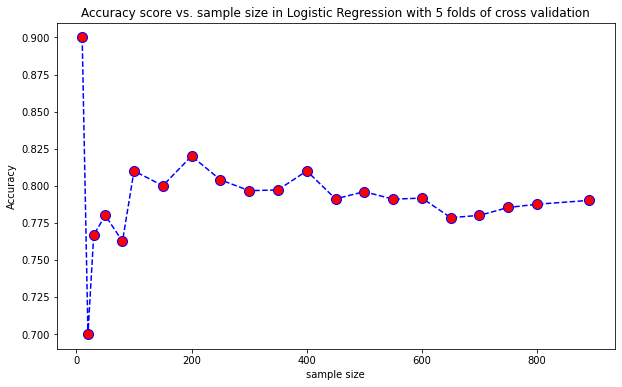

In [102]:
sample_sizes = [10,20,30,50,80,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,891]
X = data[["Pclass_1","Pclass_2","Pclass_3","SibSp","Parch","Fare","Sexcode","FareCat","FamilyCount","AgeCat","Embarked_C","Embarked_Q","Embarked_S"]]
y = data.Survived

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

score = []

for s in sample_sizes:
    # Instanciate the model
    reg_model = LogisticRegression(random_state=0, max_iter=4000)
    
    X_sample = X_scaled[:s]
    y_sample = y[:s]

    # Train the model on the scaled Training data
    cv_results = cross_validate(reg_model, X_sample,y_sample.values, cv = 5, scoring = 'accuracy')

    # Append the score
    score.append(cv_results['test_score'].mean())
    
plt.figure(figsize=(10,6))
plt.plot(sample_sizes,score,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy score vs. sample size in Logistic Regression with 5 folds of cross validation')
plt.xlabel('sample size')
plt.ylabel('Accuracy');
print("Mean:",round(np.array(score).mean(),3))
print("Standard deviation:",round(np.array(score).std(),3))

Mean: 0.792
Standard deviation: 0.005


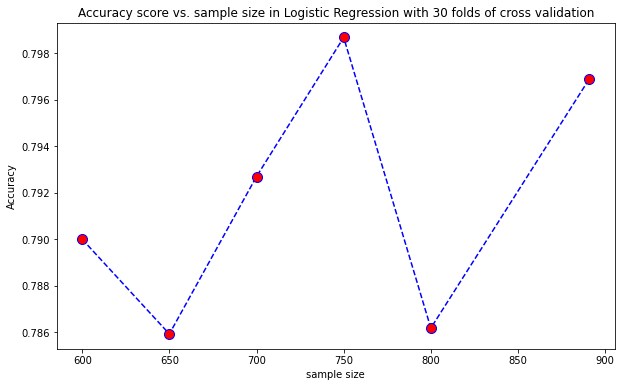

In [103]:
sample_sizes = [600,650,700,750,800,891]
X = data[["Pclass_1","Pclass_2","Pclass_3","SibSp","Parch","Fare","Sexcode","FareCat","FamilyCount","AgeCat","Embarked_C","Embarked_Q","Embarked_S"]]
y = data.Survived

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

score = []

for s in sample_sizes:
    # Instanciate the model
    reg_model = LogisticRegression(random_state=0, max_iter=4000)
    
    X_sample = X_scaled[:s]
    y_sample = y[:s]

    # Train the model on the scaled Training data
    cv_results = cross_validate(reg_model, X_sample,y_sample.values, cv = 30, scoring = 'accuracy')

    # Append the score
    score.append(cv_results['test_score'].mean())
    
plt.figure(figsize=(10,6))
plt.plot(sample_sizes,score,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy score vs. sample size in Logistic Regression with 30 folds of cross validation')
plt.xlabel('sample size')
plt.ylabel('Accuracy');
print("Mean:",round(np.array(score).mean(),3))
print("Standard deviation:",round(np.array(score).std(),3))

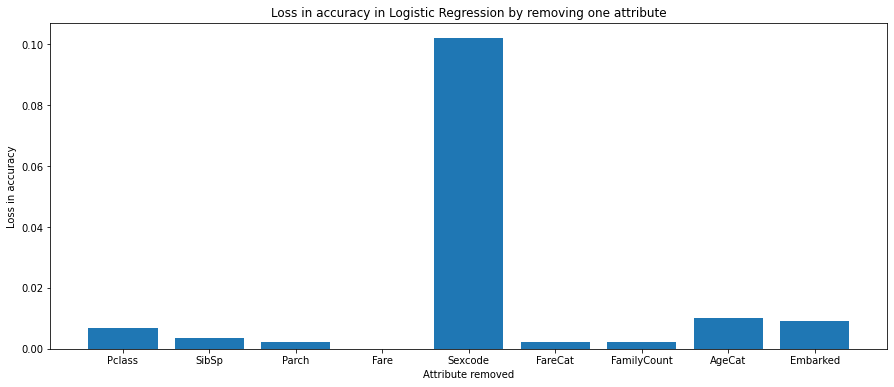

In [104]:
plt.rcParams['figure.figsize'] = (15, 6)

all_variables = ["Pclass_1","Pclass_2","Pclass_3","SibSp","Parch","Fare","Sexcode","FareCat","FamilyCount","AgeCat","Embarked_C","Embarked_Q","Embarked_S"]
y = data.Survived

score = []

for i in range(len(all_variables)):
    reg_model = LogisticRegression(random_state=0, max_iter=4000)
    using = all_variables.copy()
    without = all_variables[i]
    if "Pclass" in without:
        using.remove("Pclass_1")
        using.remove("Pclass_2")
        using.remove("Pclass_3")
    elif "Embarked" in without:
        using.remove("Embarked_C")
        using.remove("Embarked_Q")
        using.remove("Embarked_S")
    else:
        using.remove(without)

    X = data[using]
    scaler = StandardScaler()
    X_rescaled = scaler.fit_transform(X)
    
    cv_results = cross_validate(reg_model, X_rescaled,y.values, cv = 30, scoring = 'accuracy')
    score.append(cv_results["test_score"].mean())
    
all_variables = ["Pclass","SibSp","Parch","Fare","Sexcode","FareCat","FamilyCount","AgeCat","Embarked"]
loss = [max(score) - x for x in score]
loss = loss[2:11]
plt.bar(all_variables,loss)
plt.title("Loss in accuracy in Logistic Regression by removing one attribute")
plt.xlabel("Attribute removed")
plt.ylabel("Loss in accuracy")
plt.rcParams['figure.figsize'] = (10, 6)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


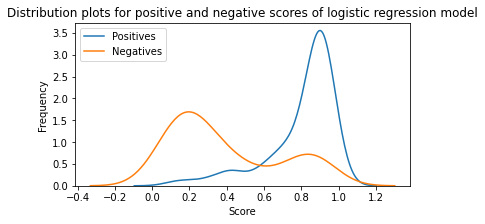

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=5)

reg_model = LogisticRegression(random_state=0, max_iter=4000)
reg_model.fit(X_train, y_train)

y_pred = reg_model.predict(X_test)  #predict for default 0.5 threshold
y_pred_prob = reg_model.predict_proba(X_test) #get the probabilities of predictions

scores_for_negatives = y_pred_prob[y_test==1][:,0]
scores_for_positives = y_pred_prob[y_test==-1][:,0]

plt.figure(figsize=(6,3))
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution plots for positive and negative scores of logistic regression model')

sns.distplot(scores_for_positives, label='Positives', hist=False)
sns.distplot(scores_for_negatives, label='Negatives', hist=False)
plt.legend(loc='best')

In [106]:
y_pred_prob[y_test==1][:,0]

array([0.83100931, 0.10985356, 0.9436222 , 0.02543908, 0.83100931,
       0.23733833, 0.1569057 , 0.93290236, 0.3116395 , 0.16359466,
       0.28538146, 0.82923469, 0.78383112, 0.43117667, 0.20732626,
       0.86250483, 0.22722416, 0.37894264, 0.8030077 , 0.20892673,
       0.90478106, 0.72067612, 0.10986228, 0.23733833, 0.13621493,
       0.80182536, 0.24806079, 0.31151385, 0.43874203, 0.1569057 ,
       0.15226131, 0.29912569, 0.15890191, 0.15890191, 0.20995344,
       0.55336025, 0.0816946 , 0.03723349, 0.1182676 , 0.71286144,
       0.1569057 , 0.3116395 , 0.44933838, 0.82057824, 0.20690482,
       0.40391419, 0.20335566, 0.83864333, 0.08983748, 0.54702165,
       0.26744795, 0.86316192, 0.24983262, 0.29980759, 0.90426339,
       0.15554339, 0.08633834, 0.0678689 , 0.46055585, 0.12829302,
       0.63769917, 0.90387797, 0.24806079, 0.29912569, 0.07526422,
       0.3665922 , 0.03614867, 0.24806079, 0.05223977, 0.21105427,
       0.31785369, 0.16272682, 0.13675086, 0.43985974, 0.16213

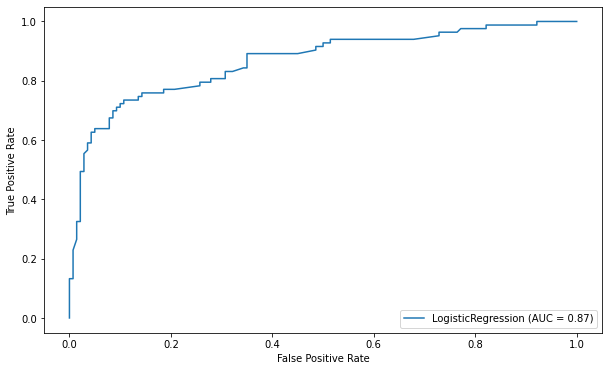

In [107]:
reg_model.fit(X_train, y_train)
metrics.plot_roc_curve(reg_model, X_test, y_test)
plt.show()